## Image Classification and Clustering

In this notebook, we will use the lfw_people dataset to demonstrate how to perform some basic data analysis and machine learning tasks using Python. The lfw_people dataset contains images of 62 celebrities, each with at least 20 images, with a size of 62 x 47 pixels. Our goal is to use the features of these images to classify and cluster them.

In [1]:
# Load data
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)

# Check targets
print(people.target)
print(people.target_names)
print(people['data'].shape)

[61 25  9 ... 14 15 14]
['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi

(87, 65)
Number of classes: 62
shape of targetss: (3023,)
Alejandro Toledo           39Alvaro Uribe               35Amelie Mauresmo            21Andre Agassi               36
Angelina Jolie             20Ariel Sharon               77Arnold Schwarzenegger      42Atal Bihari Vajpayee       24
Bill Clinton               29Carlos Menem               21Colin Powell              236David Beckham              31
Donald Rumsfeld           121George Robertson           22George W Bush             530Gerhard Schroeder         109
Gloria Macapagal Arroyo    44Gray Davis                 26Guillermo Coria            30Hamid Karzai               22
Hans Blix                  39Hugo Chavez                71Igor Ivanov                20Jack Straw                 28
Jacques Chirac             52Jean Chretien              55Jennifer Aniston           21Jennifer Capriati          42
Jennifer Lopez             21Jeremy Greenstock          24Jiang Zemin                20John Ashcroft              53
John N

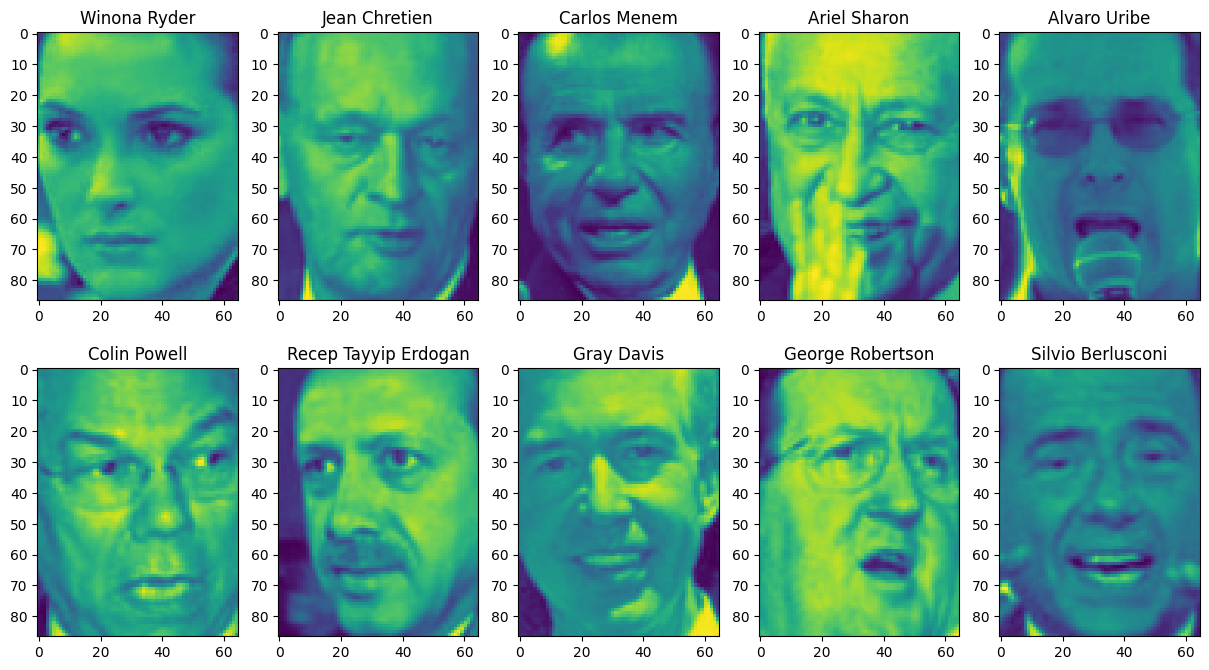

In [2]:
# Display and inspect images

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Count the number of images per target value
counts = np.bincount(people.target)

# Get the image shape
image_shape = people.images[0].shape
print(image_shape)
print("Number of classes:", len(people.target_names))
print("shape of targetss:", people.target.shape)

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 5, figsize=(15,8))

# Loop over the targets, images, and axes
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

# Loop over the counts and target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='')
    if (i + 1) % 4 == 0:
        print()

Clustering result:
 [0 0 0 ... 0 0 0]
Clustering center:
 [[0.14818282 0.16367184 0.07822184]
 [0.70108075 0.6307259  0.58155165]]


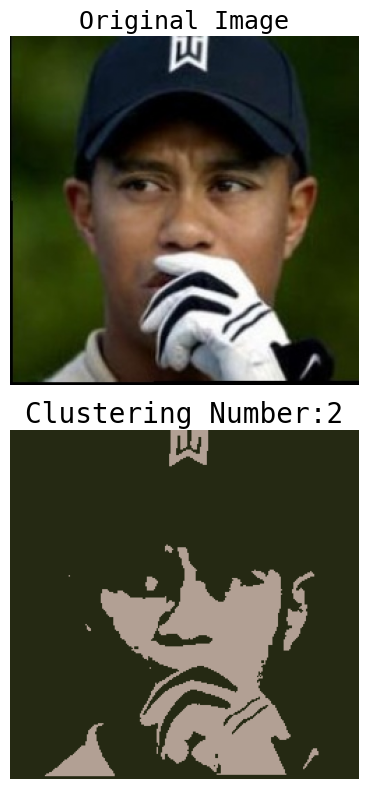

In [3]:
#Cluster images using vector quantization

from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

# Define a function to restore the image from the codebook and the cluster labels
def restore_image(cb, cluster, shape):
    # Get the row, column, and channel of the image shape
    row, col, dummy = shape
    # Create an empty image array
    image = np.empty((row, col, dummy))
    # Loop over the row and column indices
    for r in range(row):
        for c in range(col):
            # Assign the codebook value to the image pixel based on the cluster label
            image[r, c] = cb[cluster[r * col + c]]
    # Return the restored image
    return image

if __name__ == '__main__':
    # Set some parameters for plotting
    plt.rcParams['font.family'] = 'monospace'
    matplotlib.rcParams['axes.unicode_minus'] = False
    
    num_vq = 2
    im = Image.open('../data/lfw_funneled/Tiger_Woods/Tiger_Woods_0023.jpg')
    image = np.array(im).astype(float) / 255
    image = image[:, :, :3]
    image_v = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_vq, init='k-means++', n_init=10)
    
    # Get the number of pixels in the image
    N = image_v.shape[0]
    
    # Randomly sample 70% of the pixels as the training da
    idx = np.random.randint(0, N, size=int(N * 0.7))
    image_sample = image_v[idx]
    
    # Fit the model to the training data
    kmeans.fit(image_sample)
    
    # Predict the cluster labels for all the pixels in the image
    result = kmeans.predict(image_v)
    
    # Print the clustering result and the codebook values
    print('Clustering result:\n', result)
    print('Clustering center:\n', kmeans.cluster_centers_)
    
    # Display the original image on the first subplot
    plt.figure(figsize=(15,8), facecolor='w')
    plt.subplot(211)
    plt.axis('off')
    plt.title(u'Original Image', fontsize=18)
    plt.imshow(image)
    
    # Restore and display the clustered image on the second subplot
    plt.subplot(212)
    vq_image = restore_image(kmeans.cluster_centers_, result, image.shape)
    plt.axis('off')
    plt.title(u'Clustering Number:%d' % num_vq, fontsize=20)
    plt.imshow(vq_image)
    
    # Adjust the layout of the figure and show the figure
    plt.tight_layout()
    plt.show()

In [4]:
# List available fonts

import matplotlib.font_manager as fm

fonts = fm.findSystemFonts()
for font in fonts:
    print(font)

/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf
